In [1]:
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
import cv2
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from NetFunction import Net
from NetFunction import Train_Model

In [2]:
#prepare data
trainset = torchvision.datasets.MNIST('./content', train=True, transform=transforms.ToTensor(), target_transform=None, download=True)
testset = torchvision.datasets.MNIST('./content', train=False, transform=transforms.ToTensor(), target_transform=None, download=True)

# Use the torch dataloader to iterate through the dataset
# We want the dataset to be shuffled during training.
trainset_loader = DataLoader(trainset, batch_size=64, shuffle=True, num_workers=1)

# Use the torch dataloader to iterate through the dataset
testset_loader = DataLoader(testset, batch_size=1000, shuffle=False, num_workers=1)

print('Size of training data: {}'.format(len(trainset))) # len = 60000
print('Size of testing data: {}'.format(len(testset)))  # len = 10000

Size of training data: 60000
Size of testing data: 10000


tensor(0) tensor(7) tensor(8) tensor(5) tensor(7) tensor(8) tensor(4) tensor(4) tensor(0) tensor(7) tensor(2) tensor(3) tensor(6) tensor(6) tensor(9) tensor(2)


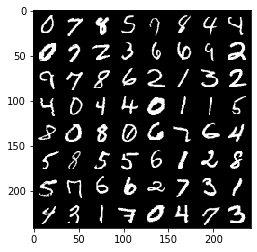

In [3]:
import matplotlib.pyplot as plt

# functions to show an image
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

# get some random training images
dataiter = iter(trainset_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % labels[j] for j in range(16)))

In [4]:
model = Net()

In [6]:
trainer = Train_Model(model, trainset_loader, testset_loader, lr=0.001, momentum=0.9)

#Train model
trainer.train(5, save_interval = 500, log_interval = 100)

Train Epoch: 0 [0/60000 (0%)]	Loss: 2.301278
Train Epoch: 0 [6400/60000 (11%)]	Loss: 2.278581
Train Epoch: 0 [12800/60000 (21%)]	Loss: 2.272666
Train Epoch: 0 [19200/60000 (32%)]	Loss: 2.276026
Train Epoch: 0 [25600/60000 (43%)]	Loss: 2.258652
Train Epoch: 0 [32000/60000 (53%)]	Loss: 2.214814
Model saved to ./content/mnist-500.pth
Train Epoch: 0 [38400/60000 (64%)]	Loss: 2.127509
Train Epoch: 0 [44800/60000 (75%)]	Loss: 1.963989
Train Epoch: 0 [51200/60000 (85%)]	Loss: 1.524605
Train Epoch: 0 [57600/60000 (96%)]	Loss: 1.451405
Time to complete a epoch: 36.54s


C:\Users\vicen\Anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Average loss: 0.9124, Accuracy: 8160/10000 (82%)

Model saved to ./content/mnist-938.pth
Train Epoch: 1 [3968/60000 (7%)]	Loss: 0.673539
Model saved to ./content/mnist-1000.pth
Train Epoch: 1 [10368/60000 (17%)]	Loss: 0.496989
Train Epoch: 1 [16768/60000 (28%)]	Loss: 0.742828
Train Epoch: 1 [23168/60000 (39%)]	Loss: 0.481353
Train Epoch: 1 [29568/60000 (49%)]	Loss: 0.203053
Train Epoch: 1 [35968/60000 (60%)]	Loss: 0.326908
Model saved to ./content/mnist-1500.pth
Train Epoch: 1 [42368/60000 (71%)]	Loss: 0.462405
Train Epoch: 1 [48768/60000 (81%)]	Loss: 0.322441
Train Epoch: 1 [55168/60000 (92%)]	Loss: 0.361027
Time to complete a epoch: 35.05s

Test set: Average loss: 0.2436, Accuracy: 9257/10000 (93%)

Model saved to ./content/mnist-1876.pth
Train Epoch: 2 [1536/60000 (3%)]	Loss: 0.235781
Train Epoch: 2 [7936/60000 (13%)]	Loss: 0.360146
Model saved to ./content/mnist-2000.pth
Train Epoch: 2 [14336/60000 (24%)]	Loss: 0.352431
Train Epoch: 2 [20736/60000 (35%)]	Loss: 0.114180
T

In [7]:
# Test a custom checkpoint
#trainer.load_checkpoint('./data/mnist-4500.pth')
#trainer.test()